In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

### Open the Gathered Data CSV File

In [2]:
df = pd.read_csv('roofline-data.csv', quotechar='"')

In [3]:
print(df.shape)
print(df.columns)

(1304, 13)
Index(['Kernel Name', 'traffic', 'dpAI', 'spAI', 'dpPerf', 'spPerf', 'xtime',
       'Block Size', 'Grid Size', 'device', 'targetName', 'exeArgs',
       'kernelName'],
      dtype='object')


### Let's drop rows with NULL values

These were executions that yielded no performance counter data (i.e: they didn't do single/double precision floating point operations).

In [4]:
df = df[df['Kernel Name'].notna()] 

print(df.shape)

(1263, 13)


## Scale the Performance Data

Here we scale down the `spPerf` and `dpPerf` columns to be on the scale of 1e11 (like how it's done in `ncu`).

In [5]:
df['dpPerf'] = df['dpPerf']*(1e-11)
df['spPerf'] = df['spPerf']*(1e-11)

### Let's plot what we have so far

We have double and single precision FLOP data, so we're going to have two plots.

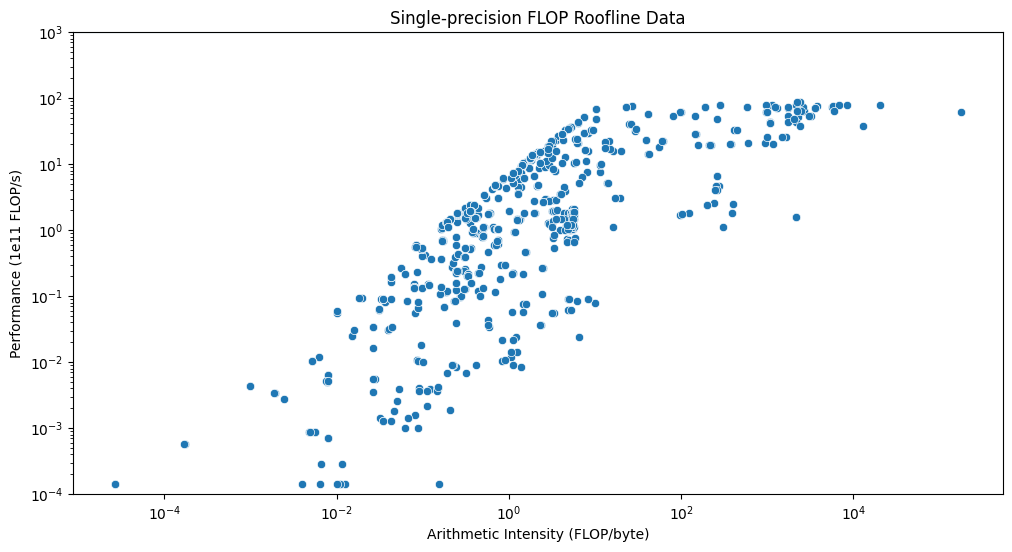

In [15]:
fig, ax = plt.subplots(1, figsize=(12,6))

sns.scatterplot(df, x='spAI', y='spPerf', ax=ax)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title('Single-precision FLOP Roofline Data')

ax.set_xlabel('Arithmetic Intensity (FLOP/byte)')
ax.set_ylabel('Performance (1e11 FLOP/s)')

ax.set_ylim(1e-4,1e3)

plt.show()

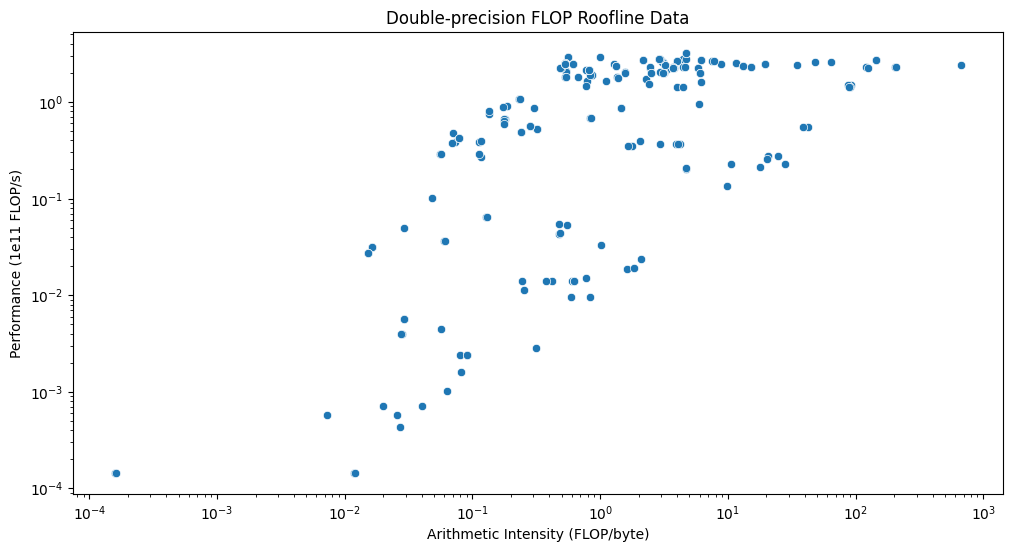

In [9]:

fig, ax = plt.subplots(1, figsize=(12,6))

sns.scatterplot(df, x='dpAI', y='dpPerf', ax=ax)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title('Double-precision FLOP Roofline Data')

ax.set_xlabel('Arithmetic Intensity (FLOP/byte)')
ax.set_ylabel('Performance (1e11 FLOP/s)')

plt.show()